# 3. Regresión Logística

Entrenaremos usando *scikit-learn* una regresión logística para clasificar dígitos manuscritos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True) # no usar notación 'e'

## Conjunto de Datos

Usaremos el [digits dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) que viene con *scikit-learn*.

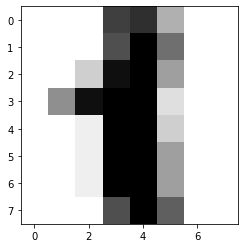

In [2]:
from sklearn import datasets

# Cargamos el dataset entero:
digits = datasets.load_digits()

i = 1
# Display the first digit
plt.figure(1, figsize=(4, 4))
plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [3]:
digits.target[i]

1

In [4]:
digits.images[i]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [5]:
# Cargamos sólo vectores X e y:
X, y = datasets.load_digits(return_X_y=True)

In [6]:
X[i].reshape(8, 8)

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [7]:
# ¿Cuántas imágenes hay para cada dígito?
from collections import Counter

Counter(y)

Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

## División en Entrenamiento y Evaluación

Dividiremos aleatoriamente los datos en una parte para entrenamiento (*80%*) y otra para evaluación (*20%*).

Usaremos [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de *scikit-learn*:

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

## Instanciar y Entrenar

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2500)

## Inspeccionar Parámetros

In [10]:
model.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
# coef_[i, j] es el score que aporte el feature j a la clase i
model.coef_.shape

(10, 64)

In [12]:
model.coef_[:, 0] # pixel esquina superior izquierda

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
model.coef_[:, 3] # pixel arriba al medio

array([ 0.06427579,  0.06817846,  0.02600404,  0.10154705, -0.45106225,
       -0.14330338, -0.02664495,  0.09408039, -0.04363274,  0.31055758])

In [14]:
model.coef_[:, 3 + 4 * 8] # pixel del medio

array([-0.14193242, -0.10742775, -0.07941498,  0.09163863, -0.1870186 ,
       -0.20211512,  0.20321502, -0.10172263,  0.27704513,  0.24773273])

In [15]:
model.intercept_ # bias

array([  1.92360328,  -9.07827657,   3.74309541,  -4.19499453,
        14.01890835,  -0.35490995,  -0.66401834,   4.96434364,
         1.27234655, -11.63009783])

## Evaluar

In [16]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9583333333333334

## Predecir

In [17]:
x = np.array([[ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.],
              [ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.],
              [ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.],
              [ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.],
              [ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.],
              [ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.],
              [ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.],
              [ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.]])

In [18]:
x = x.ravel() # aplanar la matriz en un vector

In [19]:
# Clase más probable:
model.predict([x])

array([1])

In [20]:
# Probabilidad de cada clase (resultado del softmax):
model.predict_proba([x])

array([[0.        , 0.99998738, 0.00000632, 0.00000009, 0.00000286,
        0.        , 0.        , 0.00000028, 0.00000308, 0.        ]])

In [21]:
# Score para cada clase (antes del softmax):
model.decision_function([x])

array([[-14.47840912,  18.22744307,   6.25606365,   2.00380667,
          5.46295911, -14.58973047,  -4.60366498,   3.12133349,
          5.5353748 ,  -6.93517621]])

In [22]:
# Score equivalente a mano:
model.coef_.dot(x) + model.intercept_

array([-14.47840912,  18.22744307,   6.25606365,   2.00380667,
         5.46295911, -14.58973047,  -4.60366498,   3.12133349,
         5.5353748 ,  -6.93517621])

## Ejercicios

1. Calcular el *softmax* a mano para un ejemplo, y verificar que da igual que `predict_proba`.
2. Buscar en el conjunto de test una imagen mal clasificada. Graficarla. ¿Qué tan lejos estuvo de ser correctamente clasificada?
3. Con la imagen anterior, ¿Qué píxeles influyeron más en la clasificación incorrecta? Intentar modificar los valores para que la clasificación sea correcta.
4. Buscar en el conjunto de test la imagen **peor** clasificada. Graficarla. ¿Qué tan difícil es para un humano identificar el dígito?

In [23]:
digits.data.shape

(1797, 64)

**Ejercicio 1**

In [24]:
# Some random index
i = 123

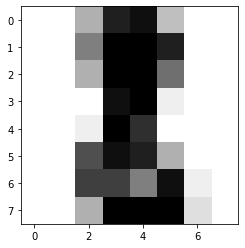

In [25]:
# Display some random digit
plt.figure(1, figsize=(4, 4))
plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [26]:
digits.target[i]

8

In [27]:
digits.images[i]

array([[ 0.,  0.,  5., 14., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  8., 16., 16., 14.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0., 15., 16.,  1.,  0.,  0.],
       [ 0.,  0.,  1., 16., 13.,  0.,  0.,  0.],
       [ 0.,  0., 11., 15., 14.,  5.,  0.,  0.],
       [ 0.,  0., 12., 12.,  8., 15.,  1.,  0.],
       [ 0.,  0.,  5., 16., 16., 16.,  2.,  0.]])

In [28]:
x = X[i]

x.reshape(8, 8)

array([[ 0.,  0.,  5., 14., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  8., 16., 16., 14.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0., 15., 16.,  1.,  0.,  0.],
       [ 0.,  0.,  1., 16., 13.,  0.,  0.,  0.],
       [ 0.,  0., 11., 15., 14.,  5.,  0.,  0.],
       [ 0.,  0., 12., 12.,  8., 15.,  1.,  0.],
       [ 0.,  0.,  5., 16., 16., 16.,  2.,  0.]])

In [29]:
# Clase más probable:
model.predict([x])

array([8])

In [30]:
# Probabilidad de cada clase (resultado del softmax):
model.predict_proba([x])

array([[0.        , 0.01630124, 0.00477337, 0.00003765, 0.        ,
        0.        , 0.00000096, 0.        , 0.97888679, 0.        ]])

In [31]:
# score: coefs * x + bias
score = model.coef_.dot(x) + model.intercept_
# score_exps: e^(score)
score_exps = np.exp(score)
# weights: sum(score_exps)
weights = score_exps.sum()
# probability: score_exps / weights
probability = score_exps / weights

probability

array([0.        , 0.01630124, 0.00477337, 0.00003765, 0.        ,
       0.        , 0.00000096, 0.        , 0.97888679, 0.        ])

**Ejercicios 2 | 3 | 4**

In [32]:
y_pred = model.predict(X_test)

# Buscamos todos los errores en el conjunto de test
errors = np.where(y_test != y_pred)[0]

errors

array([ 56,  84,  90,  94, 118, 124, 130, 181, 196, 213, 235, 301, 325,
       331, 335])

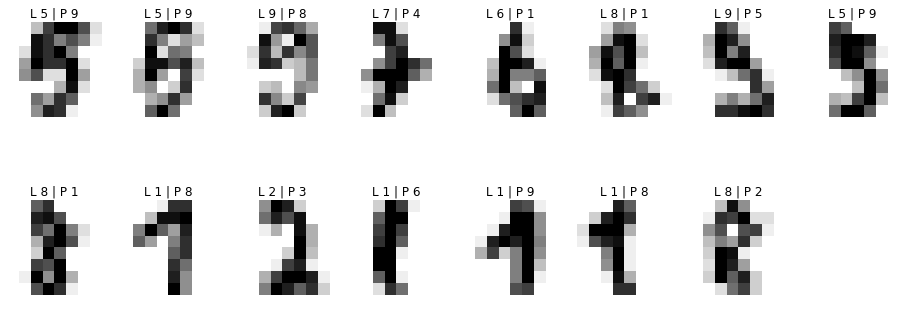

In [33]:
import math

# Create general layout
n_cols = 8
n_rows = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 6))

for i, e in enumerate(errors):
    row = math.floor(i / n_cols)
    col = i % n_cols
    ax = axs[row, col]

    ax.imshow(X_test[e].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.axis('off')
    ax.set_title(f'L {y_test[e]} | P {y_pred[e]}')

# Limpiamos subplots vacíos
for col in range(n_cols):
    for row in range(n_rows):
        if not axs[row, col].lines:
            axs[row, col].axis('off')

En total, en el conjunto de test, nuestro clasificador cometió **15** errores.

En la mayoría de los casos, el dígito se puede identificar prácticamente de forma instantánea.
Salvo una excepción, la cual coincide con la **peor** clasificación realizada por nuestro modelo.

In [34]:
worst_prob = 1

# Calculemos, para cada error en test, las respectivas probabilidades
for e in errors:
    # Etiqueta
    label = y_test[e]
    # Predicción
    prediction = y_pred[e]
    # Modelo
    probability = model.predict_proba([X_test[e]])
    # Probabilidad de Etiqueta
    label_prob = probability[:, label]
    # Probabilidad de Predicción
    prediction_prob = probability[:, prediction]
    # Resultados
    print(f'L {label} | L/P {label_prob} | P {prediction} | P/P {prediction_prob}')
    print('--------------------------------------------------')
    # Búsqueda de la peor clasificación (según etiqueta verdadera)...
    if label_prob < worst_prob:
        worst_prob = label_prob
        worst_error = e
        worst_label = label
        worst_prediction = prediction

L 5 | L/P [0.01925964] | P 9 | P/P [0.98073881]
--------------------------------------------------
L 5 | L/P [0.44801028] | P 9 | P/P [0.55082885]
--------------------------------------------------
L 9 | L/P [0.32820935] | P 8 | P/P [0.66844265]
--------------------------------------------------
L 7 | L/P [0.05932781] | P 4 | P/P [0.9374527]
--------------------------------------------------
L 6 | L/P [0.00021503] | P 1 | P/P [0.93731266]
--------------------------------------------------
L 8 | L/P [0.01521881] | P 1 | P/P [0.98326437]
--------------------------------------------------
L 9 | L/P [0.00050358] | P 5 | P/P [0.99948953]
--------------------------------------------------
L 5 | L/P [0.00017775] | P 9 | P/P [0.99841996]
--------------------------------------------------
L 8 | L/P [0.17828632] | P 1 | P/P [0.82080731]
--------------------------------------------------
L 1 | L/P [0.08334745] | P 8 | P/P [0.69535268]
--------------------------------------------------
L 2 | L/P [

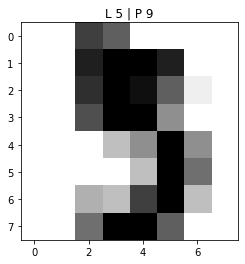

In [35]:
# Display the worst prediction
plt.figure(1, figsize=(4, 4))
plt.imshow(X_test[worst_error].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')

plt.title(f'L {worst_label} | P {worst_prediction}')
plt.show()

In [36]:
probability = model.predict_proba([X_test[worst_error]])

probability

array([[0.00000019, 0.00120164, 0.        , 0.00017   , 0.        ,
        0.00017775, 0.        , 0.        , 0.00003045, 0.99841996]])

In [37]:
probability[:, worst_prediction] - probability[:, worst_label]

array([0.99824222])

Se observa que se cometió un error importante en este ejemplo.
- Con probabilidad $0.9984$ se eligió al dígito **9**.
- Con probabilidad $0.0012$ se elegía al dígito **1**.
- Con probabilidad $0.0002$ se elegía al dígito **5**.

In [38]:
# Limitaremos un poco la precisión numérica...
np.set_printoptions(precision=3)

In [39]:
# Coeficientes para predecir el dígito 5
model.coef_[worst_label].reshape(8, 8)

array([[ 0.   ,  0.077,  0.439, -0.143,  0.083,  0.259,  0.367, -0.07 ],
       [-0.   ,  0.023,  0.26 ,  0.169,  0.036, -0.116, -0.065, -0.016],
       [-0.   , -0.011,  0.142, -0.034, -0.449, -0.512, -0.414, -0.003],
       [-0.   ,  0.181,  0.263, -0.165,  0.236,  0.035, -0.235,  0.   ],
       [ 0.   , -0.07 ,  0.101, -0.202, -0.029, -0.077,  0.015,  0.   ],
       [ 0.   , -0.189, -0.129, -0.241, -0.107,  0.165, -0.081, -0.   ],
       [ 0.   ,  0.014, -0.056, -0.084, -0.084, -0.063, -0.026, -0.013],
       [ 0.   ,  0.047,  0.352,  0.198, -0.074,  0.107, -0.024, -0.071]])

In [40]:
# Coeficientes para predecir el dígito 9.
model.coef_[worst_prediction].reshape(8, 8)

array([[ 0.   , -0.143, -0.011,  0.311,  0.234, -0.06 ,  0.013, -0.044],
       [-0.   ,  0.107,  0.163,  0.153, -0.126,  0.127,  0.175, -0.057],
       [ 0.   ,  0.056,  0.059,  0.18 ,  0.259,  0.576,  0.081, -0.073],
       [ 0.   ,  0.041,  0.273,  0.409,  0.162,  0.263, -0.05 , -0.001],
       [ 0.   , -0.323, -0.14 ,  0.248, -0.137,  0.079,  0.111,  0.   ],
       [ 0.   ,  0.067, -0.438, -0.759, -0.368, -0.163, -0.196, -0.   ],
       [ 0.   ,  0.057, -0.15 , -0.192, -0.199, -0.296, -0.117,  0.046],
       [ 0.   , -0.157,  0.005,  0.085,  0.033,  0.13 , -0.097,  0.07 ]])

Intentaremos corregir a mano el ejemplo problemático.

In [41]:
fixed_X = X_test[worst_error].reshape(8, 8)

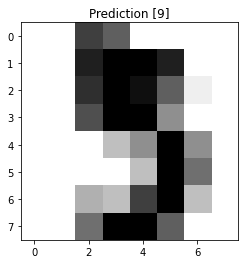

In [42]:
plt.figure(1, figsize=(4, 4))
plt.imshow(fixed_X, cmap=plt.cm.gray_r, interpolation='nearest')

# ¿Qué predice nuestro modelo?
prediction = model.predict([fixed_X.ravel()])

plt.title(f'Prediction {prediction}')
plt.show()

In [43]:
fixed_X[2, 5] = 0. # Negativo para 5, y Positivo para 9
fixed_X[2, 6] = 0. # Negativo para 5

fixed_X[5, 4] = 16. # Negativo para 9

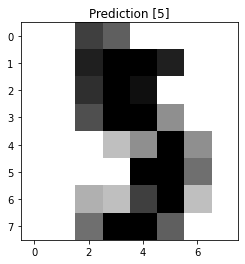

In [44]:
plt.figure(1, figsize=(4, 4))
plt.imshow(fixed_X, cmap=plt.cm.gray_r, interpolation='nearest')

# ¿Qué predice nuestro modelo?
prediction = model.predict([fixed_X.ravel()])

plt.title(f'Prediction {prediction}')
plt.show()